#### Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

#### import water data

In [2]:
excel_water_data = pd.ExcelFile("Nigeria_water_data.xlsx")
water_data = excel_water_data.parse("water_data")
water_data.head()

,water_point_type,YEAR of Survey,community,breakdown,lift_mechanism,sector,facility_name,unique,lga,latitude,longitude,Unnamed: 11
0,Tap,2012,Ohazu Egbelu,Functional,NaN,water,Water Point,abia,aba,5.084141,7.344743,NaN
1,Tap,2012,Eziukwu,Functional,NaN,water,Water Point,abia,aba,5.110569,7.364257,NaN
2,Tap,2012,Egbelu Ohazu,Functional,NaN,water,Water Point,abia,aba,5.084135,7.344219,NaN
3,Tap,2012,Eziukwu Aba,Functional,NaN,water,Water Point,abia,aba,5.108267,7.361805,NaN
4,Tap,2012,Eziukwu Aba,Functional,NaN,water,Water Point,abia,aba,5.098391,7.344580,NaN


## Data Cleaning

In [3]:
#think some columns here are unnecessary... might still drop some later
#but dropping these should do for now
water_data = water_data.drop(["Unnamed: 11","community","sector","facility_name","lift_mechanism"],axis = 1)


In [4]:
# change unique to State
water_data = water_data.rename({"unique":"State"},axis=1)

In [5]:
water_data.describe(include="all")

,water_point_type,YEAR of Survey,breakdown,State,lga,latitude,longitude
count,132057,132510.000000,131554,132510,132510,132510.000000,132510.000000
unique,12,NaN,8,37,620,NaN,NaN
top,Tap,NaN,Functional,jigawa,river,NaN,NaN
freq,44907,NaN,84460,11467,3109,NaN,NaN
mean,NaN,2011.840201,NaN,NaN,NaN,9.272408,7.197793
std,NaN,0.405879,NaN,NaN,NaN,2.625872,2.337404
min,NaN,2009.000000,NaN,NaN,NaN,4.282018,2.706824
25%,NaN,2012.000000,NaN,NaN,NaN,7.182107,5.183902
50%,NaN,2012.000000,NaN,NaN,NaN,9.017254,7.318745
75%,NaN,2012.000000,NaN,NaN,NaN,11.919237,8.744324


In [6]:
water_data.isna().sum()

water_point_type    453
YEAR of Survey        0
breakdown           956
State                 0
lga                   0
latitude              0
longitude             0
dtype: int64

In [7]:
water_data.nunique()

water_point_type        12
YEAR of Survey           4
breakdown                8
State                   37
lga                    620
latitude            129984
longitude           130152
dtype: int64

## EDA

In [8]:
# I think there should be a relationship between the two categorcal variables
#  breakdown and water_point_type
water_data.water_point_type.value_counts()

Tap                                       44907
Borehole                                  28123
Unimproved Well                           26793
Handpump                                  15966
Unimproved                                 6185
Overhead Tank                              4223
Don't Know                                 3621
Unimproved Large Diameter Well             1291
Untreated Surface Water                     495
Unprotected Spring                          410
Unimproved Rainwater Harvesting System       24
Rainwater Harvesting System                  19
Name: water_point_type, dtype: int64

In [9]:
water_data.breakdown.value_counts()

Functional            84460
Mechanical Issue      23479
Poorly Constructed     6842
Dry Well               4667
Don't Know             4574
Under Construction     4299
Poor Water Quality     3069
Other                   164
Name: breakdown, dtype: int64

In [10]:
#reduce unique values
# going to replace some of the above values with a more general term as I feel
# they are almost the same thing
water_data.water_point_type = water_data.water_point_type.replace(dict.fromkeys(["Unimproved Well","Unimproved Large Diameter Well","Untreated Surface Water",
                                                                                 "Unprotected Spring","Unimproved Rainwater Harvesting System",
                                                                                 "Rainwater Harvesting System"],"Unimproved"))
# creating more NaN values as these values are not specific
water_data.breakdown = water_data.breakdown.replace({"Don't Know":float("NaN"),"nan":float("NaN"),"Other":float("NaN"),
                                                     "Poorly Constructed":"Mechanical Issue"})



##### check how above affected these cat variables

In [11]:
water_data.water_point_type.value_counts()

Tap              44907
Unimproved       35217
Borehole         28123
Handpump         15966
Overhead Tank     4223
Don't Know        3621
Name: water_point_type, dtype: int64

In [12]:
water_data.breakdown.value_counts()

Functional            84460
Mechanical Issue      30321
Dry Well               4667
Under Construction     4299
Poor Water Quality     3069
Name: breakdown, dtype: int64

In [13]:
#missing values should have increased in breakdown let's check
water_data.isna().sum()

water_point_type     453
YEAR of Survey         0
breakdown           5694
State                  0
lga                    0
latitude               0
longitude              0
dtype: int64

In [14]:
# I feel i can drop na
water_data = water_data.dropna()

In [15]:
water_data.isna().sum()

water_point_type    0
YEAR of Survey      0
breakdown           0
State               0
lga                 0
latitude            0
longitude           0
dtype: int64

##### cross tab of breakdown and water_point_type

In [16]:
breakdown_type_crosstab = pd.crosstab(index=water_data["water_point_type"], 
                           columns=water_data["breakdown"])

In [17]:
breakdown_type_crosstab.style.background_gradient(cmap='summer_r')

breakdown,Dry Well,Functional,Mechanical Issue,Poor Water Quality,Under Construction
water_point_type,,,,,
Borehole,446,17210,8066,492,943
Don't Know,77,1834,1040,69,248
Handpump,358,9502,4978,225,325
Overhead Tank,18,2218,1401,58,287
Tap,332,25127,13689,648,2157
Unimproved,3426,28363,1122,1572,274


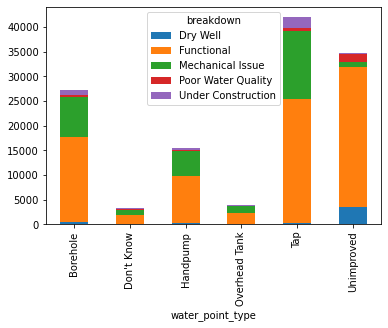

In [18]:
breakdown_type_crosstab.plot.bar(stacked=True)

In [ ]:
# To help analysis later on I'd just make this breakdown into numbers
# water_data.breakdown = water_data.breakdown.replace({'Dry Well':0,'Under Construction':1,'Poor Water Quality':3,
#                                                     'Functional':4, 'Mechanical Issue':2, "nan":5,})
# for i in water_data.breakdown.unique():
#   if i in range(0,5):
#     int(i)